## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.segmentation import disk_level_set

## Paths

In [3]:
IMG_PATH = r'C:/Users/ginof/OneDrive - ITU/Documentos/GitHub/fyp2021p3g03/data/example_image/'
SEG_PATH = r'C:/Users/ginof/OneDrive - ITU/Documentos/GitHub/fyp2021p3g03/data/example_segmentation/'

TRUTH = 'fyp2021p3g03/data/example_ground_truth.csv'
FEATURES = 'fyp2021p3g03/features/features.csv'

## Import single image and create mask

In [4]:
image = plt.imread(SEG_PATH+'ISIC_0001769_segmentation.png')

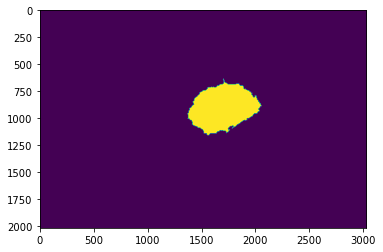

In [5]:
plt.imshow(image)

Up/Down Symmetry: 85.34%
Left/Right Symmetry: 41.42%


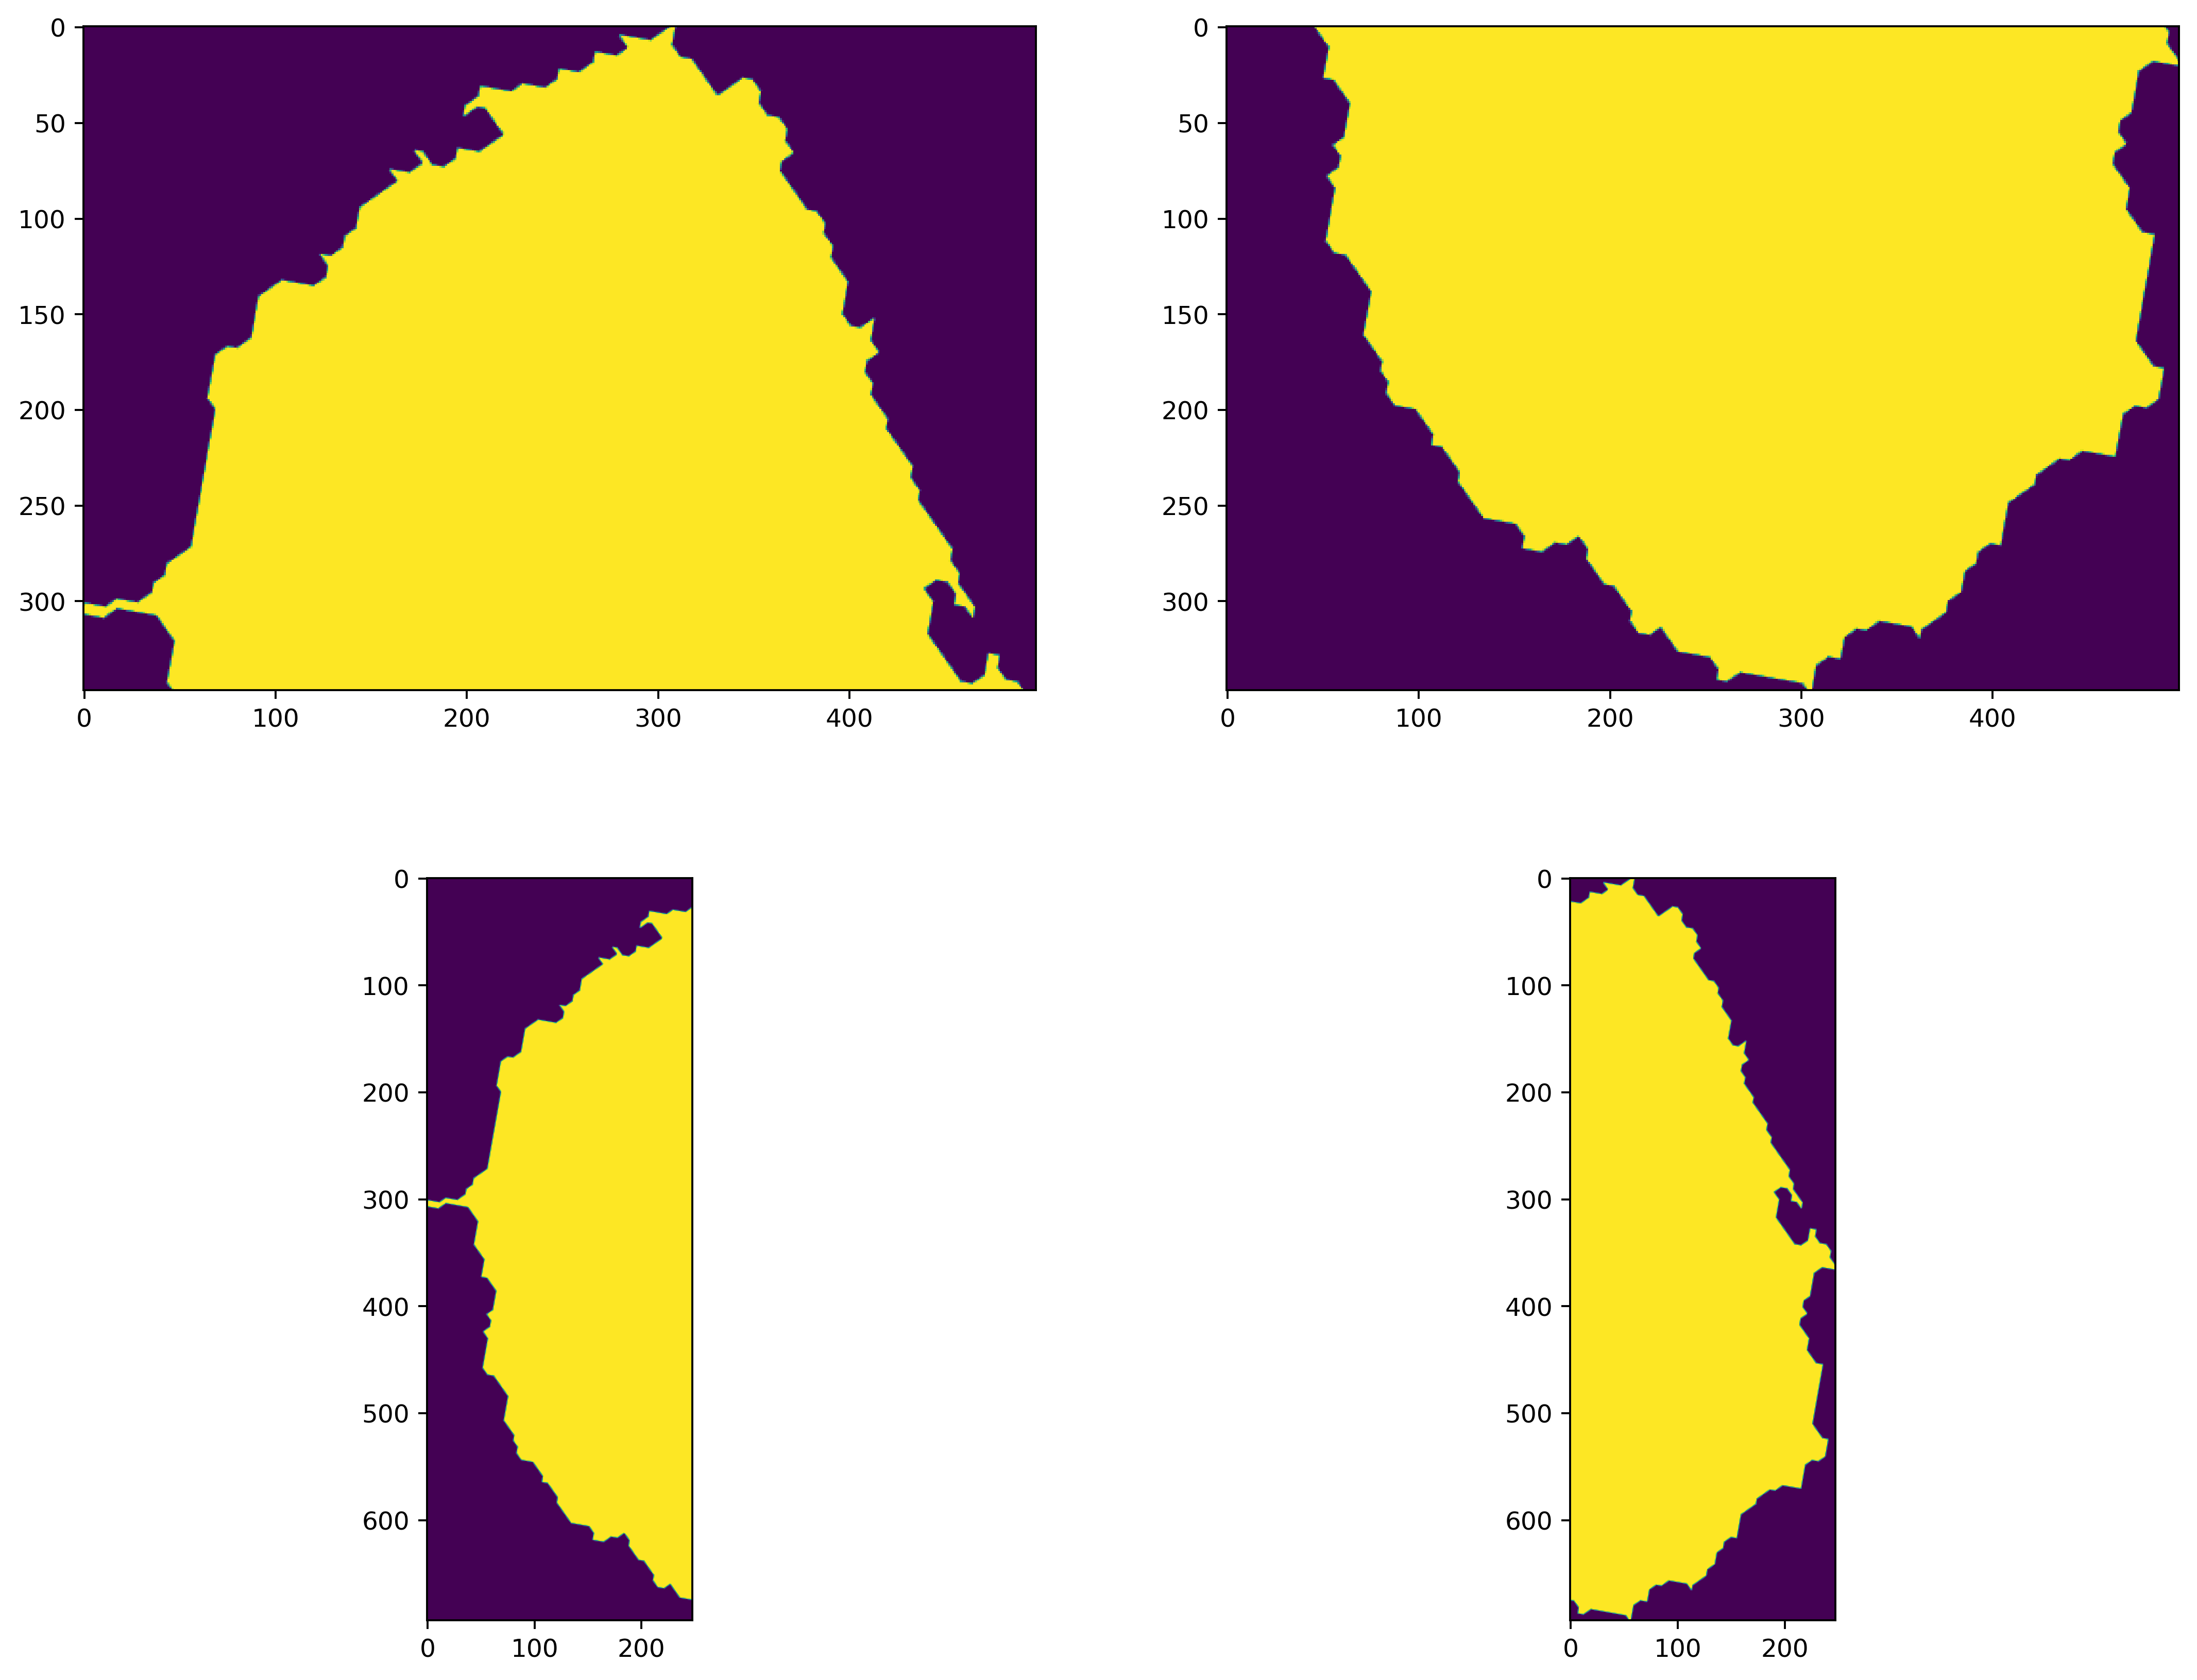

In [40]:
def get_boundaries(image):
    mask = np.where(image == 1)
    left = min(mask[1])
    right = max(mask[1])
    upper = min(mask[0])
    lower = max(mask[0])
    return upper, lower, left, right

def get_center(image):
    up, dw, lt, rt = get_boundaries(image)
    center = ((up + dw)//2,(rt + lt)//2)
    return center
    
def zoom(image):
    up, dw, lt, rt = get_boundaries(image)
    if ((up+dw) % 2) != 0:
        dw +=1 
    if ((rt+lt) % 2) != 0:
        rt +=1
    rectangle = image[up:dw, lt:rt]
    return rectangle


def test_symmetry(image, show=False):

    img = []
    symmetries = []
    
    for deg in range(0,90, 10):
        rot_image = skimage.transform.rotate(image, deg)
        z = zoom(rot_image)
        up, dw, lt, rt = get_boundaries(z)
        center = get_center(z)
        upside = z[up:center[0]+1,:]
        downside = z[center[0]:dw,:]
        leftside = z[:,lt:center[1]]
        rightside = z[:,center[1]+1:rt]

        up_dw = np.sum(np.bitwise_and(upside.astype(int), np.flipud(downside).astype(int))) /\
        np.sum(np.bitwise_or(upside.astype(int), np.flipud(downside).astype(int)))

        lt_rt = np.sum(np.bitwise_and(leftside.astype(int), np.flipud(rightside).astype(int))) /\
        np.sum(np.bitwise_or(leftside.astype(int), np.flipud(rightside).astype(int)))
    
        symmetries.append((up_dw+lt_rt)/2)
        img.append(z)
    
    symmetry = max(symmetries)
    #optimal = img[symmetries.index(symmetry)]
    
    if show:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,12), dpi=350)
        ax1.imshow(upside)
        ax2.imshow(downside)
        ax3.imshow(leftside)
        ax4.imshow(rightside)

        print(f'Up/Down Symmetry: {up_dw:.2%}')
        print(f'Left/Right Symmetry: {lt_rt:.2%}')
    
    else:
        return (symmetry)
    
    
test_symmetry(image, show=False)